In [135]:
import geopandas
import pathlib
import shapely
import numpy
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [87]:
base_path = pathlib.Path(r"C:\Local\data\river_bathemetry\sections\Westport")

# Split out different sections depending on the test dataset
### Small
Includes sections Section7, Section8, Section9, Section10

In [88]:
sections = geopandas.read_file(base_path / "river_outlines" / "small" / "measured_sections.geojson")
riverbanks = geopandas.read_file(base_path / "river_outlines" / "small" / "river_banks.geojson")

In [177]:
riverbanks

,Name,geometry
0,Right,"LINESTRING (1483413.197 5375259.983, 1483420.6..."
1,Left,"LINESTRING (1483187.524 5375194.332, 1483194.2..."


# Explore Interpolation between sections
1. Create a centreline from the polygon
2. Create cross sections along the centreline
3. Estimate the Thalweg from the measued sections
4. Interpolate along points sampled along the lines

### 1. Create Centreline from briverbanks file

In [158]:
# resample to the same number of points
n = 100
for row in range(len(riverbanks)):
    riverbanks.loc[row, 'geometry'] = shapely.geometry.LineString([riverbanks.iloc[row].geometry.interpolate(float(i)/n, normalized=True) for i in range(n + 1)])

In [178]:
# produce a centreline
riverbanks.loc[2] = ("Centre", shapely.geometry.LineString([shapely.geometry.MultiPoint([pt1, pt2]).centroid for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords)])) 

In [181]:
#riverbanks.plot()

### 2. Create cross sections along the centreline

In [204]:
# Distance by numpy
import time
print("Compare shapely and numpy time")
start = time.time()
print(f"numpy time {numpy.max([numpy.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2) for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords)])}")
end = time.time()
print(end - start)
# Distance by shapely
start = time.time()
print(f"shapely time {numpy.max([shapely.geometry.Point(pt1).distance(shapely.geometry.Point(pt2)) for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords)])}")
end = time.time()
print(end - start)
print("shapely is slower than numpy")

Compare shapely and numpy time
numpy time 308.73408146871725
0.002183198928833008
shapely time 308.73408146871725
0.0056188106536865234
shapely is slower than numpy


In [205]:
# Distance - for length of cross sections
distance = numpy.max([numpy.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2) for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords)])

In [ ]:
shapely.geometry.Point([(pt1[0]+pt2[0])/2,(pt1[1]+pt2[1])/2])

In [ ]:
[shapely.geometry.MultiPoint([pt1, pt2]).centroid for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords)]

In [211]:
# Set width of each 
centrelines = {"widths": [], "cross sections": []}
for (pt1, pt2) in zip(riverbanks.iloc[0].geometry.coords, riverbanks.iloc[1].geometry.coords):
    centrelines["widths"].append(numpy.max([numpy.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)]))
    centrelines
    

In [212]:
centrelines["widths"]

[235.02847614460168,
 235.76928504898848,
 236.51018537431685,
 237.2511762641046,
 237.9922568719505,
 238.73342636355795,
 239.47468391239903,
 249.94734796485673,
 263.37852073120064,
 273.00547129876054,
 274.7471665316182,
 276.488869743782,
 278.2305807853996,
 279.97229951079777,
 281.7140257772365,
 283.4557594459327,
 285.19750038104456,
 284.8161917929614,
 283.2735050166268,
 281.73165873753845,
 280.19066683176385,
 278.65054347361985,
 277.1113031447072,
 275.5729606419804,
 274.03553108505145,
 272.4990299268068,
 271.3894597808581,
 270.3127697554332,
 269.2366958717861,
 268.1612455472536,
 267.086426314306,
 266.0122458229009,
 264.9387118418617,
 263.8879061026842,
 263.16123847600505,
 262.2413567198197,
 261.3219912272863,
 260.40314746605776,
 260.16800343888167,
 263.09743901586256,
 266.02687640335347,
 268.9563155423901,
 271.8857563757767,
 278.68131220142897,
 289.5325591852397,
 300.2433211793135,
 306.1137628212697,
 308.73408146871725,
 304.6653836609059,
 

# debug geofabrics

In [98]:
cache_path = pathlib.Path(r"C:\Local\data\catchments\Westport\caches\NZ20_Westport")
folder = "paper"
channel = geopandas.read_file(cache_path / folder / "wide_river" / "network_river_centreline_6308000000_smoothed.geojson")

In [ ]:
channel2 = geopandas.read_file(cache_path / folder / "wide_river" / "aligned_river_centreline_6308000000.geojson")

<Axes: >

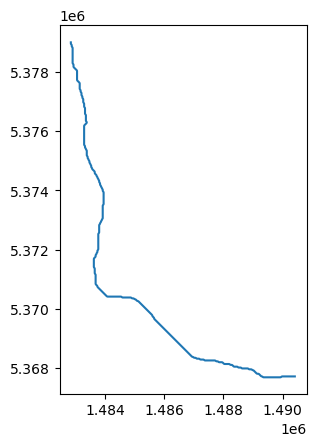

In [100]:
geopandas.read_file(r"C:\Local\repos\GeoFabrics\tests\test_river_bathymetry_osm_wellington\data\

In [118]:
n=geopandas.read_file(r"C:\Local\repos\GeoFabrics\tests\test_river_bathymetry_osm_wellington\data\rec1_flow_and_friction.geojson").to_crs(crs)

In [120]:
crs

<Derived Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [119]:
n

,NZREACH,CATCHAREA,to_node,from_node,n,flow,geometry
0,9003916,8.892000e+05,9003911,9004036,0.03180,0.315610,"LINESTRING (1768316.145 5472724.000, 1768333.8..."
1,9003795,9.897300e+06,9003799,9004118,0.02826,3.178111,"LINESTRING (1769431.619 5472724.000, 1769413.9..."
2,9003917,2.812272e+05,9003911,9003930,0.03180,0.117465,"LINESTRING (1768453.876 5472741.724, 1768423.8..."
3,9003882,1.263443e+06,9003888,9003911,0.02708,0.440559,"LINESTRING (1768393.876 5472801.727, 1768423.8..."
4,9003855,1.420191e+08,9003799,9003876,0.04478,138.415185,"LINESTRING (1769645.000 5472951.707, 1769623.9..."
5,9003756,1.521514e+08,9003756,9003799,0.04242,125.797577,"LINESTRING (1769353.920 5473251.723, 1769353.9..."
6,9003742,1.532630e+08,9003747,9003756,0.04242,124.559510,"LINESTRING (1769143.913 5473461.734, 1769113.9..."
7,9003615,1.100127e+06,9003756,9003610,0.03062,0.409006,"LINESTRING (1769645.000 5473752.796, 1769623.9..."


<Axes: >

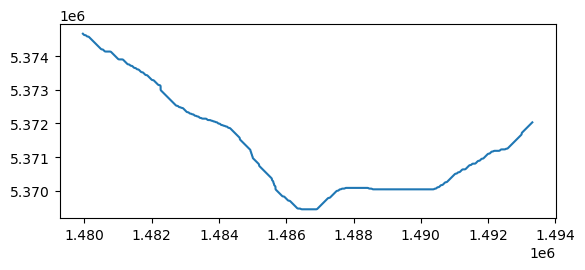

In [108]:
channel.rotate(45).plot()

<Axes: >

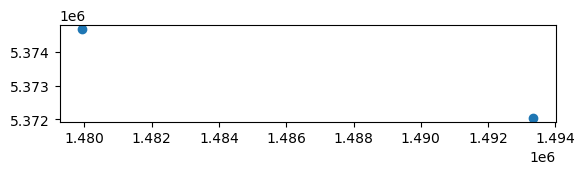

In [109]:
channel.rotate(45).boundary.plot()